# Import Libraries

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pathlib

# Data Import


In [77]:
from google.colab import drive
drive.mount('/content/drive')
dataset_name = pd.read_csv('/content/drive/MyDrive/Datasets/spaceship_titanic/spaceship-titanic/train.csv')
df = dataset_name
filepath = '/content/drive/MyDrive/Datasets/spaceship_titanic/spaceship-titanic/train.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Cleaning

#### Checking for Catagorical and Numerical variables

In [78]:
print("Categorical Variables")
categorical_variables = df.select_dtypes(include=['object']).columns
for col in categorical_variables:
    print(col)

Categorical Variables
PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [79]:
print("Numerical Variables")
numerical_variables = df._get_numeric_data().columns
for col in numerical_variables:
    print(col)

Numerical Variables
Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Transported


In [80]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

#### Checking for null values

In [81]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [82]:
percent_missing = df.isnull().sum() * 100 / len(df)

percent_missing

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

#### Categorical variables

- Replace None values with the most common value in the column

#### Numerical variables

- Replace the values with the mean

In [83]:
for cat_col in categorical_variables:
    if cat_col!="Name":
        df[cat_col] = df[cat_col].fillna(df[cat_col].mode()[0])    

In [84]:
for num_col in numerical_variables:
    df[num_col] = df[num_col].fillna(df[num_col].mean())

In [85]:
percent_missing = df.isnull().sum() * 100 / len(df)

percent_missing

PassengerId     0.000000
HomePlanet      0.000000
CryoSleep       0.000000
Cabin           0.000000
Destination     0.000000
Age             0.000000
VIP             0.000000
RoomService     0.000000
FoodCourt       0.000000
ShoppingMall    0.000000
Spa             0.000000
VRDeck          0.000000
Name            2.300702
Transported     0.000000
dtype: float64

# Data Exploration

Numerical data

In [86]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.339054,659.739364,1594.434978,597.417440,1124.675871,1133.259049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,78.000000,118.000000,45.000000,89.000000,71.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Categorical Data

In [87]:
df.describe(include=['object'])

,PassengerId,HomePlanet,Cabin,Destination,Name
count,8693,8693,8693,8693,8493
unique,8693,3,6560,3,8473
top,0001_01,Earth,G/734/S,TRAPPIST-1e,Gollux Reedall
freq,1,4803,207,6097,2


In [88]:
# Drop unnecessary Name column
df.drop(['Name'], axis=1, inplace=True)

In [89]:
categorical_variables = df.select_dtypes(include=['object']).columns

In [90]:
categorical_variables

Index(['PassengerId', 'HomePlanet', 'Cabin', 'Destination'], dtype='object')

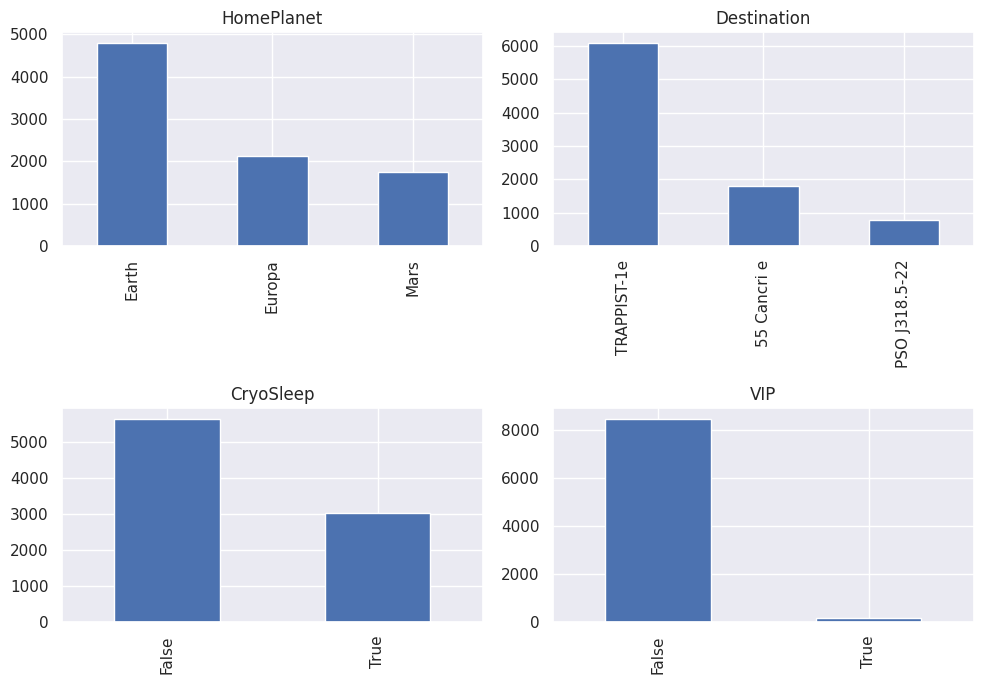

In [91]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
df['HomePlanet'].value_counts().plot(kind='bar', title='HomePlanet')
plt.subplot(2,2,2)
df['Destination'].value_counts().plot(kind='bar', title='Destination')
plt.subplot(2,2,3)
df['CryoSleep'].value_counts().plot(kind='bar', title='CryoSleep')
plt.subplot(2,2,4)
df['VIP'].value_counts().plot(kind='bar',title='VIP')
plt.tight_layout();

In [92]:
df['VIP'].value_counts()

False    8494
True      199
Name: VIP, dtype: int64

In [93]:
numerical_variables = list(numerical_variables)
if "train" in filepath:
    numerical_variables.remove('Transported')

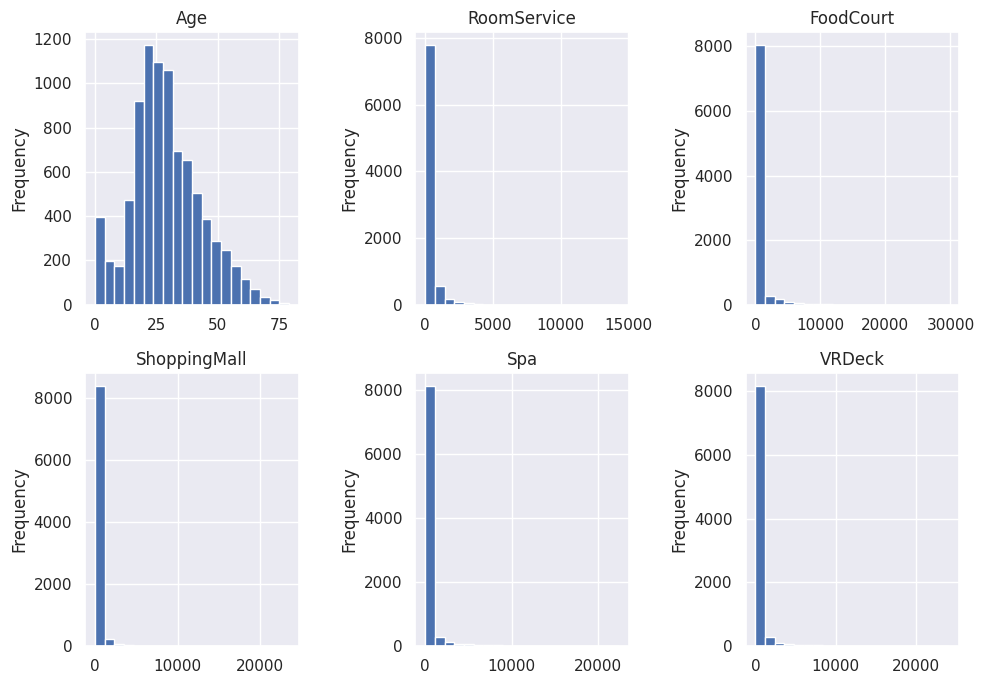

In [94]:
plt.figure(figsize=(10,7))
for i,num_col in enumerate(numerical_variables):
    plt.subplot(2,3,i+1)
    df[num_col].plot(kind='hist', bins=20)
    plt.title(num_col)
plt.tight_layout();

# Feature Engineering

1. Build 2 features out of the 'Cabin' column: deck and port

In [95]:
df['Deck'] = df['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
df['Port'] = df['Cabin'].apply(lambda s: s[-1] if pd.notnull(s) else 'M')
df['Deck'] = df['Deck'].map({'B':0, 'F':1, 'A':2, 'G':3, 'E':4, 'D':5, 'C':6, 'T':7}).astype(int)
df['Port'] = df['Port'].map({'P':0, 'S':1}).astype(int)
df.drop(['Cabin'], axis=1, inplace=True)
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,1
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,2,1
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,2,1
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,1


In [96]:
df["HomePlanet"] = df["HomePlanet"].map({'Earth':0, 'Europa':1, 'Mars':2}).astype(int)
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,0001_01,1,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,0
1,0002_01,0,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,1
2,0003_01,1,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,2,1
3,0003_02,1,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,2,1
4,0004_01,0,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,1


In [97]:
unique_destinations = df["Destination"].unique()
df["Destination"] = df["Destination"].map(dict(zip(unique_destinations,list(range(len(unique_destinations)))))).astype(int)

In [98]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,0001_01,1,False,0,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,0
1,0002_01,0,False,0,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,1
2,0003_01,1,False,0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,2,1
3,0003_02,1,False,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,2,1
4,0004_01,0,False,0,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,1


In [99]:
df["Destination"].unique()

array([0, 1, 2])

In [100]:
if 'train' in filepath:
    df.drop(['PassengerId'],axis=1, inplace=True)

In [101]:
unique_vip = df["VIP"].unique()
df["VIP"] = df["VIP"].map(dict(zip(unique_vip,list(range(len(unique_vip)))))).astype(int)

In [102]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,1,False,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0,0
1,0,False,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,1,1
2,1,False,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,2,1
3,1,False,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,2,1
4,0,False,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,1,1


In [103]:
unique_cryosleep = df["CryoSleep"].unique()
df["CryoSleep"] = df["CryoSleep"].map(dict(zip(unique_cryosleep,list(range(len(unique_cryosleep)))))).astype(int)

In [104]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,1,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0,0
1,0,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,1,1
2,1,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,2,1
3,1,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,2,1
4,0,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,1,1


In [106]:
from google.colab import files
df.to_csv('train_cleaned.csv')
files.download('train_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Modelling

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [107]:
dataset_name = pd.read_csv('/content/drive/MyDrive/Datasets/spaceship_titanic/train_cleaned.csv')
df_train = dataset_name
# filepath = '/content/drive/MyDrive/Datasets/spaceship_titanic/spaceship-titanic/train.csv'
X = df_train.drop("Transported", axis=1).values
y = df_train["Transported"].values

In [108]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape,y_train.shape, X_test.shape, y_test.shape

((6954, 12), (6954,), (1739, 12), (1739,))

#### Logistic Regression

In [111]:
lg = LogisticRegression()
lg.fit(X_train,y_train)
lg_pred_score = lg.score(X_test,y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Random Forest

In [112]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred_score = rf.score(X_test,y_test)

#### Gradient Boosting

In [113]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb_pred_score = gb.score(X_test,y_test)

#### SVM

In [114]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
svc_pred_score = svc.score(X_test,y_test)

In [115]:
df = pd.DataFrame(dict(model=['Logistic Regression', 
                              'Random Forest', 
                              'Gradient Boosting',
                              'SVM'],accuracy=[lg_pred_score, rf_pred_score, 
                                               gb_pred_score, svc_pred_score]))
df

,model,accuracy
0,Logistic Regression,0.775158
1,Random Forest,0.789534
2,Gradient Boosting,0.785509
3,SVM,0.764807


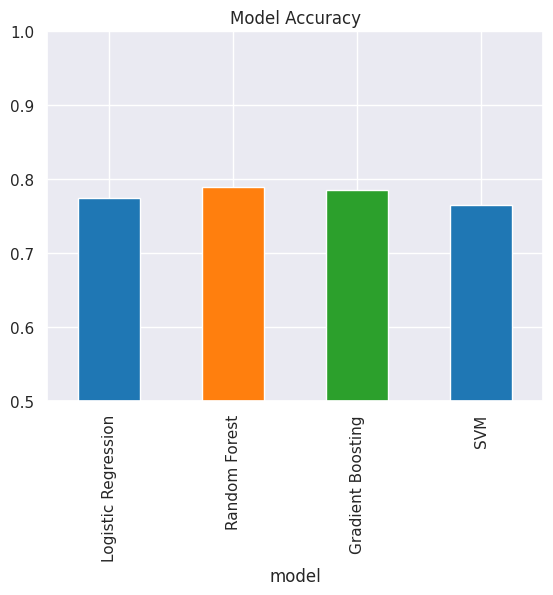

In [116]:
df.plot(kind='bar',x='model',y='accuracy',title='Model Accuracy',legend=False,
        color=['#1F77B4', '#FF7F0E', '#2CA02C'])
plt.ylim(0.5,1);

In [117]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import pathlib

In [118]:
dataset_name = pd.read_csv('/content/drive/MyDrive/Datasets/spaceship_titanic/train_cleaned.csv')
df_train = dataset_name
dataset_name = pd.read_csv('/content/drive/MyDrive/Datasets/spaceship_titanic/test_cleaned.csv')
df_test = dataset_name

In [119]:
# split
X_train = df_train.drop('Transported', axis=1)
y_train = df_train['Transported']
X_test = df_test.drop('PassengerId', axis=1).copy()

In [121]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
# lg = LogisticRegression()
# lg.fit(X_train,y_train)
# gb = GradientBoostingClassifier()
# gb.fit(X_train,y_train)
# knn = KNeighborsClassifier(n_neighbors=3)
# knn.fit(X_train,y_train)
# svc = SVC()
# svc.fit(X_train,y_train)
predictions = rf.predict(X_test)

In [128]:
# !mkdir ~/.kaggle
!cp /content/drive/MyDrive/Datasets/kaggle_json/kaggle.json ~/.kaggle
!chmod +x ~/.kaggle/kaggle.json

In [129]:
df_submissions = pd.DataFrame({'PassengerId':df_test['PassengerId'],'Transported':predictions})
df_submissions.to_csv('/content/drive/MyDrive/Datasets/spaceship_titanic/submission.csv',index=False)

In [131]:
!kaggle competitions submit -c spaceship-titanic -f /content/drive/MyDrive/Datasets/spaceship_titanic/submission.csv -m "Submission with Random Forest Classifier Model"

100% 55.2k/55.2k [00:00<00:00, 81.7kB/s]
Successfully submitted to Spaceship Titanic